In [1]:
#This program uses tensor flow to optimize the coefficients of RK2 to the exact solution of a simple test problem

#Note: Order appears to be consistent when the step size is close to the one that we trained on - in this case, it is 0.01 (which is quite small)
#Trying other h values and comparing errors from new method with classical method(s)

In [2]:
#importing necessary Python packages
import numpy as np
import tensorflow as tf
from tensorflow import keras
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import pandas as pd

In [3]:
#Problem One - simple test problem
def f(u:tf.Tensor,t:tf.Tensor) -> tf.Tensor: #Need u and t also tensorflow
    return tf.math.multiply(3,(tf.math.divide(u,t))) #change to tensor flow tensor #3*u/t

def u_Exact(t:tf.Tensor)-> tf.Tensor:
    return t**3

#Initial data
t_Initial = 1
u_Initial = u_Exact(t_Initial)
t_Final = 2


In [4]:
#Build training data with random distribution (better maybe)
h = np.full((1,1), 0.001)
h = tf.convert_to_tensor(h, dtype = tf.float32)

t_Inputs = tf.random.uniform(shape = [1,1000], minval = 1, maxval = 2)
t_Outputs = tf.math.add(t_Inputs,h)
m_Input = u_Exact(t_Inputs)
m_Output = u_Exact(t_Outputs)

In [5]:
def model(p): #Just an RK2 scheme with trainable coefficients from p in tensorflow format
    k1 = f(u_N,t_N)
    a = tf.math.add(u_N, tf.matmul(h, tf.matmul(p[0],k1))) #a = u_N+h*p[0]*k1 
    b = tf.add(t_N, tf.matmul(p[0],h))                  #b = t_N+p[0]*h
    k2 = f(a,b)                                                #k2 = f(u_N+h*p[0]*k1, b = t_N+p[0]*h)
    c = tf.matmul(p[1],tf.matmul(h,k1))          #p[1]*h*k1
    d = tf.matmul(p[2],tf.matmul(h,k2))          #p[2]*h*k2
    return tf.math.add(u_N,tf.math.add(c,d))                   #u_N + p[1]*h*k1 + p[2]*h*k2

    #k2 = f(u_N+h*a[0]*k1,t_N+a[0]*h)
    #return u_N +(1-1/(2*a[0]))*h*k1 + (1/(2*a[0]))*h*k2

def loss():
    U1 = model(p)
    return (p[1]+p[2] - 1.0)**2 + (p[2]*p[0]-1/2)**2 + tf.reduce_sum(tf.math.square(tf.math.subtract(U,U1))) 
#tf.reduce_max((U - U1)**2) + (p2+p3 - 1.0)**2 + (p3*p1-1/2)**2

In [6]:
#Minimize the loss function using parameter variables
#Adapted from https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer

#Using initial data
u_N = m_Input
t_N = t_Inputs
U = m_Output

#print(f(u_N,t_N))
#Previously tried: #np.random.randint(1,100,1)/100
                   #p2_Input = np.full((1000), ran2)

p1_Input = tf.random.uniform((1,1), minval=0, maxval=1,dtype=tf.dtypes.float32,seed=None,name=None)
p2_Input = tf.random.uniform((1,1), minval=0, maxval=1,dtype=tf.dtypes.float32,seed=None,name=None)
p3_Input = tf.random.uniform((1,1), minval=0, maxval=1,dtype=tf.dtypes.float32,seed=None,name=None)

p1 = tf.Variable(p1_Input, shape=(1,1), trainable = True)
p2 = tf.Variable(p2_Input, shape =(1,1), trainable = True)
p3 = tf.Variable(p3_Input, shape =(1,1), trainable = True)
p = tf.stack([p1,p2,p3], axis = 0) #This is concatenated,figure out how to slice in the model
p = tf.Variable(p, trainable = True)

iters = 0
prev_loss = 0
while prev_loss != loss() and iters < 45000:
    prev_loss = loss()
    iters = iters + 1
    # Create an optimizer with the desired parameters.
    opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
    # In eager mode, simply call minimize to update the list of variables.
    opt.minimize(loss, p)
    print(loss()) #Allows us to watch loss decrease
print("\n p is", p)
print('\n The number of iterations is', iters)

tf.Tensor([[0.3896834]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38951895]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.3893546]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.3891902]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38902602]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38886192]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38869792]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38853407]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.3883702]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38820657]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.388043]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38787955]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38771617]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38755286]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.3873897]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38722658]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38706362]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.38690075]], shape=(1, 1), dtype=float32)
tf.Tensor([[0.386

In [14]:
#Using p results from above

#Use approach from Anastassi paper, turn above into fraction, and then compare errors and check for improvement

print(p)
p_Model = np.array(p)
print(p_Model)

a = p_Model[0]
b = 1-(1/(2*a))
c = 1/(2*a)

p_Model=[a,b,c]

#Creating initial conditions that are not tensors for testing
#Problem One - simple test problem
def f(u,t):
    return 3*(u/t)

def u_Exact(t):
    return t**3

#Initial data
t_Initial = 1
u_Initial = np.array([u_Exact(t_Initial)])
t_Final = 2


<tf.Variable 'Variable:0' shape=(3, 1, 1) dtype=float32, numpy=
array([[[0.60137516]],

       [[0.17003083]],

       [[0.830238  ]]], dtype=float32)>
[[[0.60137516]]

 [[0.17003083]]

 [[0.830238  ]]]


In [15]:
def predict(p):
    k1 = f(u_N,t_N)
    k2 = f(u_N+h*p[0]*k1,t_N+p[0]*h)
    return u_N +p[1]*h*k1 + p[2]*h*k2

In [16]:
#Running through actual solution - Allows us to test the problem - may be best to change test problem or range
h_List=np.array([1/2, 1/4, 1/8, 1/16,1/32,1/64,1/128,1/256,1/512,1/1024])*math.pi; #Range of step sizes for convergence study
#h_List = [1/2]
e_Vector = np.empty(shape=(len(h_List),len(u_Initial)), dtype=float)
u_Order = np.empty(shape=(len(h_List)-1,len(u_Initial)), dtype=float)
for kk in range(len(h_List)):#Cycle through all ranges of h
    
    #Initialize the problem
    h=h_List[kk] #Start a single run of the method up to a final time with dt=DT(kk)
    t_Steps= math.ceil((t_Final - t_Initial)/h)
    h = (t_Final-t_Initial)/t_Steps
    h_List[kk] = h #Ensures that correct h value is used in the convergence analysis
    u_N=u_Initial
    t_N=t_Initial
    
    t_Vector = np.empty(shape=(t_Steps,), dtype=float)
    u_Approx = np.empty(shape=(t_Steps,len(u_Initial)), dtype=float)
   
    for i in range(t_Steps):
        u_Approx[i,:] = u_N
        t_Vector[i] = t_N

        #Second Order Runge Kutta;
        #a=1;     #Heun's method or trapezoidal rule
        #a=1/2;   #This is for explicit midpoint method
        #print(h*f(u_N,t_N))
        u_Np1 = predict(p_Model)

        t_N = t_N + h
        u_N = u_Np1
        #print('u_N is ', u_N)
        #print('u_Exact is', u_Exact(t_N))
        
    
    e_Vector[kk,:] = abs(u_Exact(t_Final) - u_N)
for i in range(len(u_Initial)):
    u_Order[:,i] = (np.diff(np.log10(e_Vector[:,i]))/(np.diff(np.log10(h_List))))

    
print('u_Order is: \n', u_Order)
print('Error Vector is: \n', e_Vector)

u_Order is: 
 [[1.09945448]
 [1.40347878]
 [1.63222626]
 [1.80686461]
 [1.89778501]
 [1.94801603]
 [1.97333026]
 [1.98305139]
 [1.96938889]]
Error Vector is: 
 [[2.12660997e+00]
 [9.92473842e-01]
 [5.61796105e-01]
 [1.81229820e-01]
 [6.06161051e-02]
 [1.77680390e-02]
 [4.82630844e-03]
 [1.22908940e-03]
 [3.14697280e-04]
 [8.03614678e-05]]


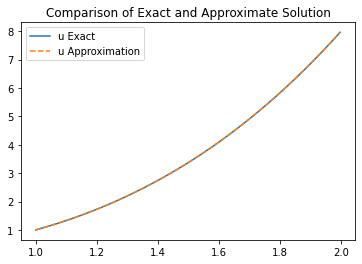

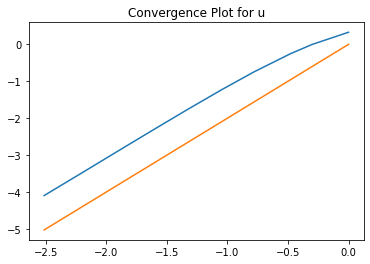

[[2.12660997e+00]
 [9.92473842e-01]
 [5.61796105e-01]
 [1.81229820e-01]
 [6.06161051e-02]
 [1.77680390e-02]
 [4.82630844e-03]
 [1.22908940e-03]
 [3.14697280e-04]
 [8.03614678e-05]]
u_Table: 
           h     Error     Order
0  1.000000  2.126610  0.000000
1  0.500000  0.992474  1.099454
2  0.333333  0.561796  1.403479
3  0.166667  0.181230  1.632226
4  0.090909  0.060616  1.806865
5  0.047619  0.017768  1.897785
6  0.024390  0.004826  1.948016
7  0.012195  0.001229  1.973330
8  0.006135  0.000315  1.983051
9  0.003067  0.000080  1.969389 



In [17]:
#This plots the exact and approximate solution(From the optimization)
fig1 = plt.figure()
plt.plot(t_Vector, u_Exact(t_Vector).ravel(), label = 'u Exact')
plt.plot(t_Vector, u_Approx, '--', label = 'u Approximation')
plt.legend()
plt.title('Comparison of Exact and Approximate Solution')
plt.show()

#This plots the convergence
fig2 = plt.plot(np.log10(h_List), np.log10(e_Vector))
plt.plot(np.log10(h_List), 2*np.log10(h_List)) #Reference slope
plt.title('Convergence Plot for u')
plt.show()

#This gives the table of values
print(e_Vector)
#Data table of results
ut_Order = np.insert(u_Order, 0,0)
et_Vector = e_Vector.ravel()
ht_List = h_List.ravel()
u_Table = pd.DataFrame({'h':ht_List, 'Error': et_Vector, 'Order': ut_Order})
print('u_Table: \n', u_Table, '\n')


In [18]:
#Just Heun's method
p_Model = [1,1/2,1/2]

#Running through actual solution - Solid method testing
h_List=np.array([1/2, 1/4, 1/8, 1/16,1/32,1/64,1/128,1/256,1/512,1/1024])*math.pi; #Range of step sizes for convergence study
#h_List = [1/2]
e_Vector = np.empty(shape=(len(h_List),len(u_Initial)), dtype=float)
u_Order = np.empty(shape=(len(h_List)-1,len(u_Initial)), dtype=float)
for kk in range(len(h_List)):#Cycle through all ranges of h
    
    #Initialize the problem
    h=h_List[kk] #Start a single run of the method up to a final time with dt=DT(kk)
    t_Steps= math.ceil((t_Final - t_Initial)/h)
    h = (t_Final-t_Initial)/t_Steps
    h_List[kk] = h #Ensures that correct h value is used in the convergence analysis
    u_N=u_Initial
    t_N=t_Initial
    
    t_Vector = np.empty(shape=(t_Steps,), dtype=float)
    u_Approx = np.empty(shape=(t_Steps,len(u_Initial)), dtype=float)
   
    for i in range(t_Steps):
        u_Approx[i,:] = u_N
        t_Vector[i] = t_N

        #Second Order Runge Kutta;
        #a=1;     #Heun's method or trapezoidal rule
        #a=1/2;   #This is for explicit midpoint method
        #print(h*f(u_N,t_N))
        u_Np1 = predict(p_Model)

        t_N = t_N + h
        u_N = u_Np1
        #print('u_N is ', u_N)
        #print('u_Exact is', u_Exact(t_N))
        
    
    e_Vector[kk,:] = abs(u_Exact(t_Final) - u_N)
for i in range(len(u_Initial)):
    u_Order[:,i] = (np.diff(np.log10(e_Vector[:,i]))/(np.diff(np.log10(h_List))))

    
print('u_Order is: \n', u_Order)
print('Error Vector is: \n', e_Vector)

u_Order is: 
 [[1.        ]
 [1.3180801 ]
 [1.57119372]
 [1.771525  ]
 [1.87849697]
 [1.93779108]
 [1.96879505]
 [1.98445341]
 [1.99222697]]
Error Vector is: 
 [[2.50000000e+00]
 [1.25000000e+00]
 [7.32500000e-01]
 [2.46508098e-01]
 [8.42349663e-02]
 [2.50011780e-02]
 [6.83765299e-03]
 [1.74678998e-03]
 [4.46819256e-04]
 [1.12308288e-04]]


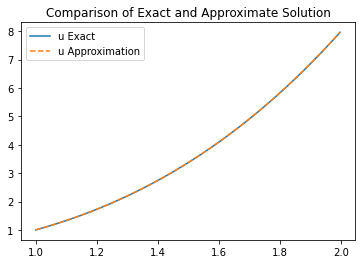

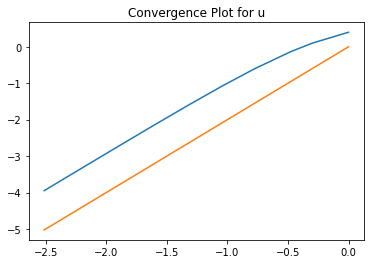

[[2.50000000e+00]
 [1.25000000e+00]
 [7.32500000e-01]
 [2.46508098e-01]
 [8.42349663e-02]
 [2.50011780e-02]
 [6.83765299e-03]
 [1.74678998e-03]
 [4.46819256e-04]
 [1.12308288e-04]]
u_Table: 
           h     Error     Order
0  1.000000  2.500000  0.000000
1  0.500000  1.250000  1.000000
2  0.333333  0.732500  1.318080
3  0.166667  0.246508  1.571194
4  0.090909  0.084235  1.771525
5  0.047619  0.025001  1.878497
6  0.024390  0.006838  1.937791
7  0.012195  0.001747  1.968795
8  0.006135  0.000447  1.984453
9  0.003067  0.000112  1.992227 



In [19]:
#This plots the exact and approximate solution(Heun's Method)
fig1 = plt.figure()
plt.plot(t_Vector, u_Exact(t_Vector).ravel(), label = 'u Exact')
plt.plot(t_Vector, u_Approx, '--', label = 'u Approximation')
plt.legend()
plt.title('Comparison of Exact and Approximate Solution')
plt.show()

#This plots the convergence
fig2 = plt.plot(np.log10(h_List), np.log10(e_Vector))
plt.plot(np.log10(h_List), 2*np.log10(h_List)) #Reference slope
plt.title('Convergence Plot for u')
plt.show()

#This gives the table of values
print(e_Vector)
#Data table of results
ut_Order = np.insert(u_Order, 0,0)
et_Vector = e_Vector.ravel()
ht_List = h_List.ravel()
u_Table = pd.DataFrame({'h':ht_List, 'Error': et_Vector, 'Order': ut_Order})
print('u_Table: \n', u_Table, '\n')